In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import sklearn
from sklearn import svm
import seaborn as sns
import pandas as pd
pd.options.display.float_format = '{:.4f}'.format

In [83]:
t = pd.read_csv("gs_wise_2.txt", header=None, sep="\t")
t = t.dropna()
t.columns = ["relevance", "tran", "price", "ocpc_bid"]
t["click"] = 1

In [84]:
t.head()

,relevance,tran,price,ocpc_bid,click
0,0.3189,0,112,6000,1
1,0.2479,0,117,10000,1
2,0.0349,0,45,800,1
3,0.2960,0,232,6500,1
4,0.4281,0,32,500,1


In [406]:
size = 20
lst = np.linspace(-1, 0.9, size)
dfs = [t[t["relevance"] > num] for num in lst]

base = t.sum()
base["trans rate"] = base["tran"] / base["click"]
base["target cost"] = base["ocpc_bid"] / base["click"]
base["trans cost"] = base["price"] / base["tran"]

gps = [df.sum()[["tran", "price", "ocpc_bid", "click"]] for df in dfs]
gps = pd.concat(gps, axis=1).T

result = pd.DataFrame({
    "trans rate":(gps["tran"] / gps["click"]) / base["trans rate"] - 1, 
    "target cost":gps["ocpc_bid"] / gps["click"] / base["target cost"] - 1,
    "trans cost":gps["price"] / gps["tran"] / base["trans cost"] - 1,
    "click":gps["click"] / base["click"] - 1,
    "price":gps["price"] / base["price"] - 1,
    "trans":gps["tran"] / base["tran"] - 1})
result.index = np.linspace(-1, 0.9, 20)
result = result[["trans rate", "target cost", "trans cost", "click", "trans", "price"]]
result

,trans rate,target cost,trans cost,click,trans,price
-1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
-0.9000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
-0.8000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
-0.7000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
-0.6000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
-0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
-0.4000,0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000
-0.3000,0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000
-0.2000,0.0000,-0.0000,-0.0000,-0.0002,-0.0002,-0.0002
-0.1000,-0.0005,-0.0002,0.0004,-0.0050,-0.0055,-0.0051


In [405]:
# base 转化率
base_tran_rate = base["trans rate"]
base_tran_rate

0.031311501925657806

In [408]:
# base 目标成本
base_target_cost = base["target cost"]
base_target_cost

9809.240575642723

In [407]:
# 转化成本
base_tran_cost = base["trans cost"]
base_tran_cost

7160.280093820679

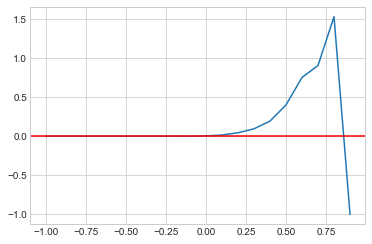

In [414]:
plt.plot(np.linspace(-1, 0.9, size), result["trans rate"])
plt.axhline(y=0.0, color='red')

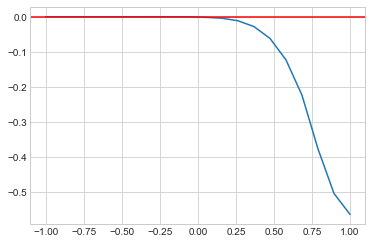

In [416]:
plt.plot(np.linspace(-1, 1, size), result["target cost"])
plt.axhline(y=0, color='red')

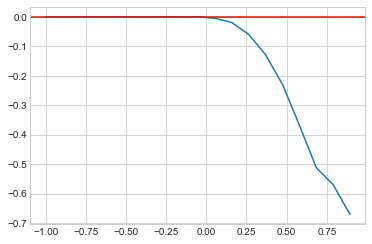

In [417]:
plt.plot(np.linspace(-1, 1, size), result["trans cost"])
plt.axhline(y=0, color='red')

In [421]:
result.to_csv("gs_wise_2.csv")

In [81]:
def process(filename):
    t = pd.read_csv(filename + ".txt", header=None, sep="\t")
    t = t.dropna()
    t.columns = ["relevance", "tran", "price", "ocpc_bid"]
    t["click"] = 1

    lst = np.linspace(-1, 0.9, size)
    dfs = [t[t["relevance"] > num] for num in lst]

    base = t.sum()
    base["trans rate"] = base["tran"] / base["click"]
    base["target cost"] = base["ocpc_bid"] / base["click"]
    base["trans cost"] = base["price"] / base["tran"]

    gps = [df.sum()[["tran", "price", "ocpc_bid", "click"]] for df in dfs]
    gps = pd.concat(gps, axis=1).T

    result = pd.DataFrame({
        "trans rate":(gps["tran"] / gps["click"]) / base["trans rate"] - 1, 
        "target cost":gps["ocpc_bid"] / gps["click"] / base["target cost"] - 1,
        "trans cost":gps["price"] / gps["tran"] / base["trans cost"] - 1,
        "click":gps["click"] / base["click"] - 1,
        "price":gps["price"] / base["price"] - 1,
        "trans":gps["tran"] / base["tran"] - 1})
    result.index = np.linspace(-1, 0.9, size)
    result = result[["trans rate", "target cost", "trans cost", "click", "trans", "price"]]

    # base 转化率
    base_tran_rate = base["trans rate"]

    # base 目标成本
    base_target_cost = base["target cost"]

    # 转化成本
    base_tran_cost = base["trans cost"]

    result.to_csv(filename + ".csv")

In [82]:
filenames = "gs_wise_2 gs_wise_14 word_title_2 word_title_14".split()
[process(filename) for filename in filenames]

[None, None, None, None]

In [8]:
filename = "base"
size = 50
process(filename)

In [9]:
process

<function __main__.process>

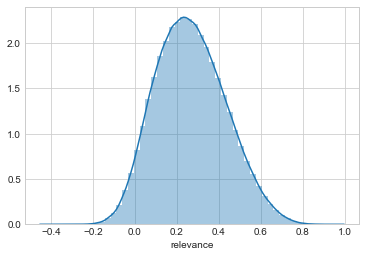

In [85]:
sns.distplot(t["relevance"])